In [1]:
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd 

from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

In [2]:
df_analyse=pd.read_csv('../data/processed/COVID_small_flattable.csv',sep=';')  
df_analyse.sort_values('date',ascending=True).head()

,date,Italy,US,India,Brazil
0,2020-01-22,0,1,0,0
1,2020-01-23,0,1,0,0
2,2020-01-24,0,2,0,0
3,2020-01-25,0,2,0,0
4,2020-01-26,0,5,0,0


In [3]:
N0=1000000 
beta=0.4  
gamma=0.1  


I0=df_analyse.US[55]
S0=N0-I0
R0=0

In [4]:


N0=1000000 #max susceptible population
beta=0.4   # infection spread dynamics
gamma=0.1  # recovery rate


# condition I0+S0+R0=N0
I0=df_analyse.US[35]
S0=N0-I0
R0=0

In [5]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

In [6]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_t in np.arange(100):
   
    new_delta_vec=SIR_model(SIR,beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

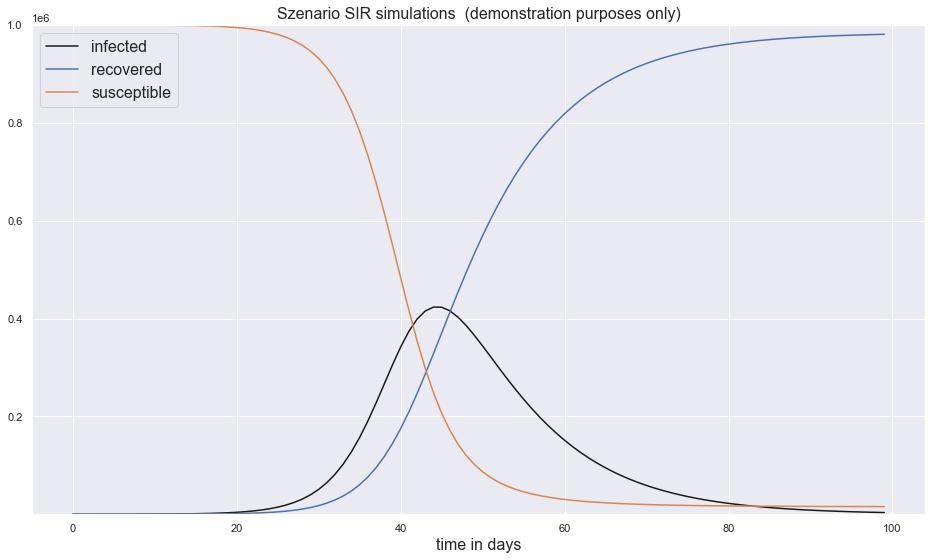

In [7]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

# Fitting the parameters of SIR curve

In [8]:
ydata = np.array(df_analyse.US[60:450])
t=np.arange(len(ydata))

In [9]:
I0=ydata[0]
S0=N0-I0
R0=0
beta

0.4

In [10]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [11]:
def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1]

In [12]:
popt=[0.4,0.1]
fit_odeint(t, *popt)

array([3.49440000e+04, 4.63773755e+04, 6.11174620e+04, 7.98108815e+04,
       1.03022723e+05, 1.31085844e+05, 1.63908189e+05, 2.00781241e+05,
       2.40267620e+05, 2.80256139e+05, 3.18229322e+05, 3.51693923e+05,
       3.78633339e+05, 3.97821877e+05, 4.08912476e+05, 4.12316869e+05,
       4.08968778e+05, 4.00068951e+05, 3.86876770e+05, 3.70571821e+05,
       3.52180195e+05, 3.32548405e+05, 3.12346794e+05, 2.92088200e+05,
       2.72152477e+05, 2.52811443e+05, 2.34251537e+05, 2.16593152e+05,
       1.99906476e+05, 1.84224167e+05, 1.69551292e+05, 1.55873030e+05,
       1.43160575e+05, 1.31375628e+05, 1.20473781e+05, 1.10407054e+05,
       1.01125766e+05, 9.25799091e+04, 8.47201419e+04, 7.74984842e+04,
       7.08687966e+04, 6.47870903e+04, 5.92117134e+04, 5.41034442e+04,
       4.94255152e+04, 4.51435885e+04, 4.12256946e+04, 3.76421474e+04,
       3.43654421e+04, 3.13701438e+04, 2.86327699e+04, 2.61316709e+04,
       2.38469119e+04, 2.17601565e+04, 1.98545544e+04, 1.81146339e+04,
      

In [13]:
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

standard deviation errors :  [2.32422430e-03 4.25744217e-05]  start infect: 34944
Optimal parameters: beta = 0.1366982467815393  and gamma =  -0.010108978635735746


In [14]:
fitted=fit_odeint(t, *popt)

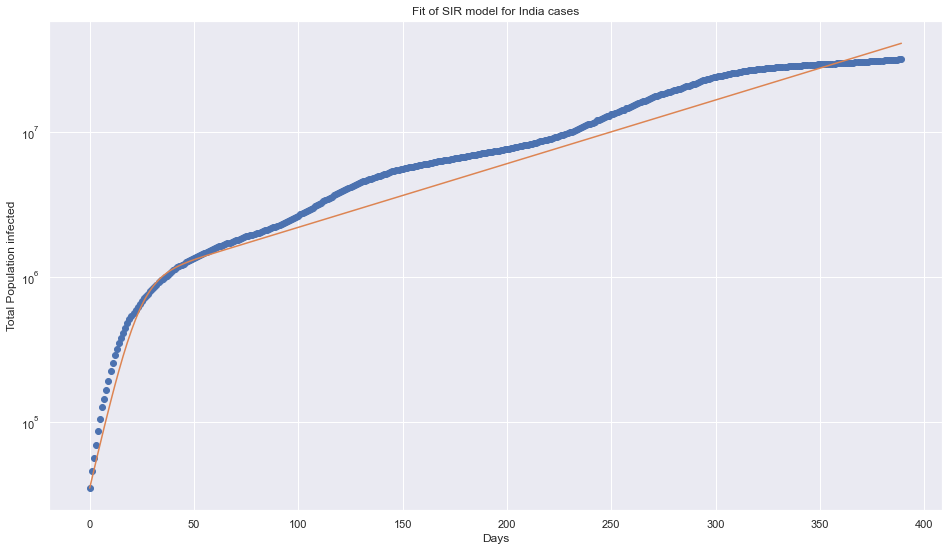

Optimal parameters: beta = 0.1366982467815393  and gamma =  -0.010108978635735746
Basic Reproduction Number R0  -13.522458767328297
This ratio is derived as the expected number of new infections are sometimes called secondary infections from a single infecin a population where all subjects are susceptible. @wiki


In [15]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted)
#plt.semilogy(fitted)

plt.title("Fit of SIR model for India cases")
plt.ylabel("Total Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print('This ratio is derived as the expected number of new infections are sometimes called secondary infections from a single infecin a population where all subjects are susceptible. @wiki')


# Dynamic Beta in SIR

In [16]:
t_initial=28
t_intro_measures=14
t_hold=21
t_relax=21

beta_max=0.4
beta_min=0.11
gamma=0.1
pd_beta=np.concatenate((np.array(t_initial*[beta_max]),
                       np.linspace(beta_max,beta_min,t_intro_measures),
                       np.array(t_hold*[beta_min]),
                        np.linspace(beta_min,beta_max,t_relax),
                       ))

In [17]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_beta in pd_beta:
   
    new_delta_vec=SIR_model(SIR,each_beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

In [18]:
pd_beta

array([0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.37769231,
       0.35538462, 0.33307692, 0.31076923, 0.28846154, 0.26615385,
       0.24384615, 0.22153846, 0.19923077, 0.17692308, 0.15461538,
       0.13230769, 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.1245    ,
       0.139     , 0.1535    , 0.168     , 0.1825    , 0.197     ,
       0.2115    , 0.226     , 0.2405    , 0.255     , 0.2695 

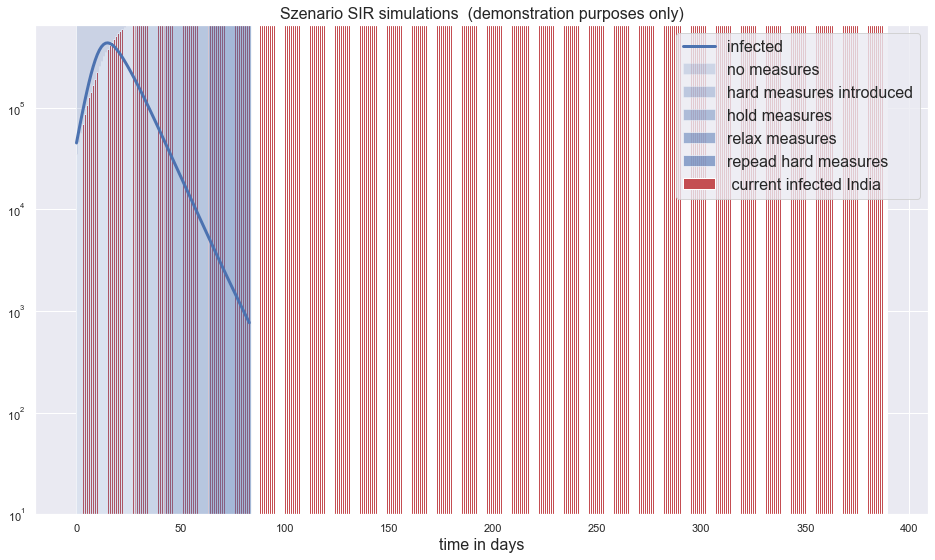

In [19]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',linewidth=3)

t_phases=np.array([t_initial,t_intro_measures,t_hold,t_relax]).cumsum()
ax1.bar(np.arange(len(ydata)),ydata, width=0.8,label=' current infected India',color='r')
ax1.axvspan(0,t_phases[0], facecolor='b', alpha=0.2,label='no measures')
ax1.axvspan(t_phases[0],t_phases[1], facecolor='b', alpha=0.3,label='hard measures introduced')
ax1.axvspan(t_phases[1],t_phases[2], facecolor='b', alpha=0.4,label='hold measures')
ax1.axvspan(t_phases[2],t_phases[3], facecolor='b', alpha=0.5,label='relax measures')
ax1.axvspan(t_phases[3],len(propagation_rates.infected), facecolor='b', alpha=0.6,label='repead hard measures')

ax1.set_ylim(10, 1.5*max(propagation_rates.infected))
ax1.set_yscale('log')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

In [20]:
country_list = ['Italy',
               'US',
               'India',
               'Brazil']

<ipython-input-10-16f200073f8a>:17: RuntimeWarning: invalid value encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


standard deviation errors :  [2.42628488e-04 8.40722535e-05]  start infect: 59138
Optimal parameters: beta = 0.010096989034810025  and gamma =  -0.006790599258927887
standard deviation errors :  [2.32422430e-03 4.25744217e-05]  start infect: 34944
Optimal parameters: beta = 0.1366982467815393  and gamma =  -0.010108978635735746
standard deviation errors :  [102600.70341933  93632.71471433]  start infect: 396
Optimal parameters: beta = -6.581707765564029  and gamma =  -3.623471154416981
standard deviation errors :  [13514.81093858 14291.93950979]  start infect: 1546
Optimal parameters: beta = 3.025274761772714  and gamma =  4.837706172077242


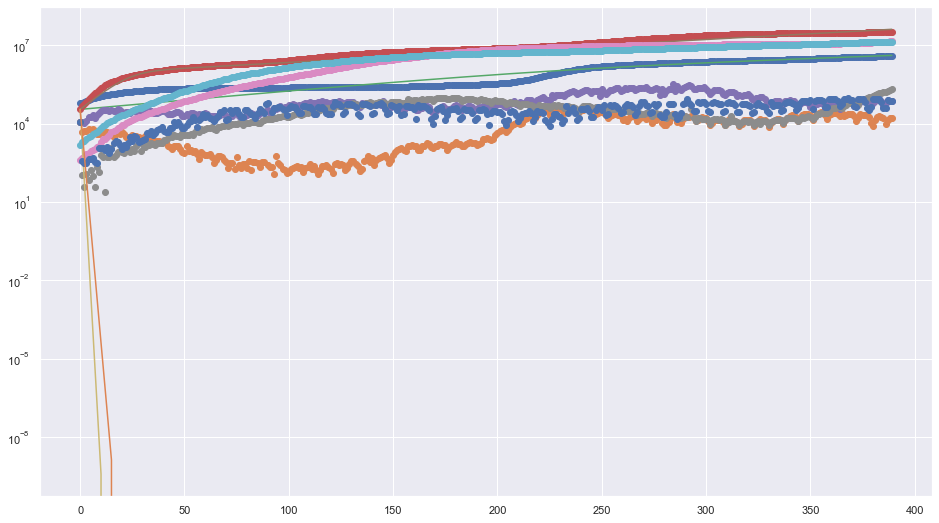

In [21]:
country_idx = 1
cum_data = []
d2d_diff_data = []
temp = []
for each in country_list:
    country = df_analyse.columns[country_idx]
    ydata_total = np.array(df_analyse[country])[60:450]
    t=np.arange(len(ydata_total))

    popt, pcov = optimize.curve_fit(fit_odeint, t, ydata_total)
    perr = np.sqrt(np.diag(pcov))
    
    print('standard deviation errors : ',str(perr), ' start infect:',ydata_total[0])
    print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
    
   
    fitted=fit_odeint(t, *popt)

    # option 1: ydata is cummulative, thus we need cumulative fitted line
    plt.semilogy(t, ydata_total, 'o')
    #plt.semilogy(t, np.cumsum(fitted))

    # option2: ydata is cummulative, however we would like to have the day to day difference
    day2day = np.ediff1d(ydata_total, to_begin=ydata[1]-ydata[0])
    plt.semilogy(t,day2day, 'o')
    plt.semilogy(t, fitted)
    
    # Storing the fitted data
    cum_data.append(fitted)
    
    # Storing the difference in cases data
    d2d_diff_data.append(np.ediff1d(ydata_total, to_begin=ydata_total[1]-ydata_total[0]))
                   
    # Assigning fitted date into Dataframe                 
    cum_data_df = pd.DataFrame(cum_data)
    cum_data_df = cum_data_df.T
    
    # Assigning difference in cases data to Dataframe
    d2d_diff_data_df = pd.DataFrame(d2d_diff_data)
    d2d_diff_data_df = d2d_diff_data_df.T
    
    country_idx = country_idx + 1
    
cum_data_df.columns = country_list
d2d_diff_data_df.columns = country_list

In [22]:
cum_data_df
df_analyse_plot = df_analyse[60:450]
df_analyse_plot = df_analyse_plot.reset_index(drop=True)

In [23]:
cum_data

[array([  34944.        ,   35526.53247247,   36118.64982285,
          36720.50553815,   37332.25542587,   37954.05763322,
          38586.07268161,   39228.46351284,   39881.39550961,
          40545.03651547,   41219.55688073,   41905.12948832,
          42601.92978627,   43310.13582082,   44029.92826767,
          44761.49046442,   45505.00844362,   46260.67096577,
          47028.66955319,   47809.19851885,   48602.45500063,
          49408.63899435,   50227.95338717,   51060.60399917,
          51906.79961076,   52766.75199508,   53640.67595481,
          54528.78935693,   55431.31316384,   56348.47145371,
          57280.49147665,   58227.60368333,   59190.04175855,
          60168.04265626,   61161.8466219 ,   62171.69722593,
          63197.84141554,   64240.52954034,   65300.01538674,
          66376.55621135,   67470.41276015,   68581.84931716,
          69711.13373842,   70858.53748253,   72024.33564422,
          73208.80698172,   74412.23393583,   75634.90268656,
        

In [ ]:
import pandas as pd
import numpy as np

import dash
dash.__version__
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output,State

import plotly.graph_objects as go

fig = go.Figure()

app = dash.Dash()
app.layout = html.Div([

    dcc.Markdown('''
    #  Applied Data Science on COVID-19 data - SIR Modelling

    Simple SIR model
    This graph shows the fitted curve and actual COVID-19 cases.
    Also the day to day difference in cases has also been plotted.
    '''),

    dcc.Markdown('''
    ## Multi-Select Country for visualization
    '''),


    dcc.Dropdown(
        id='country_drop_down',
        options=[ {'label': each,'value':each} for each in country_list],
        value=['Italy'], # which are pre-selected
        multi=True
    ),

    dcc.Graph(figure=fig, id='main_window_slope')
])


@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])

def update_figure(country_list):
    
    traces = []
    
    for each in country_list:
        
        df_plot1=df_analyse_plot[each]
        df_plot2=cum_data_df[each]
        df_plot3=d2d_diff_data_df[each]
        
        
        traces.append(dict(x=df_plot1.index,
                                y=df_plot1,
                                mode='lines',
                                opacity=0.9,
                                name=each,
                                font=dict(family='Arial',
                                size=3,
                                color='rgb(37,37,37)'),
                        )
                )
        
        traces.append(dict(x=df_plot2.index,
                                y=df_plot2,
                                mode='markers+lines',
                                opacity=0.9,
                                name=each + ' fitted curve'
                        )
                )

        traces.append(dict(x=df_plot3.index,
                                y=df_plot3,
                                mode='markers',
                                opacity=0.9,
                                name=each + ' D2D difference' 
                        )
                )
        
    return {
            'data': traces,
            'layout': dict (
                width=1280,
                height=720,

                xaxis={'title':'Timeline',
                        'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                      },

                yaxis={'title':'COVID Cases',
                        'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                        'type':"log"
                      }
        )
    }

if __name__ == '__main__':

    app.run_server(debug=True, use_reloader=False,port=8000)

Dash is running on http://127.0.0.1:8000/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


<ipython-input-24-c81e10f56dac>:6: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-24-c81e10f56dac>:7: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
